# Data Cleaning

In [1]:
# import os
# # Create a folder in the root directory
# !mkdir -p "/content/drive/My Drive/Credito_finanzas"

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import scipy
from scipy.stats import chi2_contingency

In [2]:
print("pd version", pd.__version__)
print("np version", np.__version__)
print("sns version", sns.__version__)
print("sklearn version", sklearn.__version__)
print("matplotlib version", matplotlib.__version__)
print("scipy version", scipy.__version__)

# requiments.txt
# pandas==2.2.2
# numpy==2.0.2
# seaborn==0.13.2
# scikit-learn==1.6.1
# matplotlib==3.10.0
# scipy==1.15.2
# streamlit==1.45.0

pd version 1.5.3
np version 1.23.5
sns version 0.12.2
sklearn version 1.2.1
matplotlib version 3.7.0
scipy version 1.10.0


# 1- Data Reading

In [3]:
data = pd.read_csv('hmeq.csv')
print(data['JOB'].unique())
print(data['REASON'].unique())

['Other' nan 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']
['HomeImp' nan 'DebtCon']


# 2- EDA

## 2.1- DTYPE y variables

In [4]:
# ver variables y tipo de dato
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


## 2.2 -BALANCEO de datos

In [5]:
data['BAD'].value_counts(normalize=True)

0    0.800503
1    0.199497
Name: BAD, dtype: float64

## 2.3- DUPLICADOS: Elimina las filas duplicadas si es necesario.

In [6]:
print("duplicados", data.duplicated().sum())

duplicados 0


## 2.4- NULL: trata los valores nulos (eliminar o imputar).

In [7]:
print(data.isnull().sum().sort_values(ascending=False))

DEBTINC    1267
DEROG       708
DELINQ      580
MORTDUE     518
YOJ         515
NINQ        510
CLAGE       308
JOB         279
REASON      252
CLNO        222
VALUE       112
BAD           0
LOAN          0
dtype: int64


#### Porcentaje de datos nulos

In [8]:
# # ver el porcentaje de valores nulos de cada variable.
# nulos = pd.Series({
#     'BAD': 0,
#     'LOAN': 0,
#     'MORTDUE': 518,
#     'VALUE': 112,
#     'REASON': 252,
#     'JOB': 279,
#     'YOJ': 515,
#     'DEROG': 708,
#     'DELINQ': 580,
#     'CLAGE': 308,
#     'NINQ': 510,
#     'CLNO': 222,
#     'DEBTINC': 1267
# })

# total_filas = 5960


# analisis_nulos = pd.DataFrame({
#     'Valores_Nulos': nulos,
#     'Porcentaje': (nulos / total_filas * 100).round(2)
# }).sort_values(by='Porcentaje', ascending=False)

# print(analisis_nulos)

valores_null = data.isna().sum()
print(valores_null.sort_values(ascending=False))
porcentjae = data.isna().mean()*100
print(porcentjae.sort_values(ascending=False))

DEBTINC    1267
DEROG       708
DELINQ      580
MORTDUE     518
YOJ         515
NINQ        510
CLAGE       308
JOB         279
REASON      252
CLNO        222
VALUE       112
BAD           0
LOAN          0
dtype: int64
DEBTINC    21.258389
DEROG      11.879195
DELINQ      9.731544
MORTDUE     8.691275
YOJ         8.640940
NINQ        8.557047
CLAGE       5.167785
JOB         4.681208
REASON      4.228188
CLNO        3.724832
VALUE       1.879195
BAD         0.000000
LOAN        0.000000
dtype: float64


#### imputacion de datos num

la imputacion de los datos numericos tiene que ser por separados discreto en lado y secuenciales en otro

In [9]:
# Separar variables continuas y discretas
continuous_vars = ["DEBTINC", "MORTDUE", "VALUE", "YOJ", "CLAGE"]  # Variables continuas
discrete_vars = ["DEROG", "DELINQ", "NINQ", "CLNO"]  # Variables discretas (conteos)

# Imputar variables continuas con la media
for col in continuous_vars:
    data[col] = data[col].fillna(data[col].median())

# Imputar variables discretas con la moda
for col in discrete_vars:
    data[col] = data[col].fillna(data[col].mode()[0])

# ----------------------------------------------------------

# # imputar todas las variables numericas
# cat_num = ["DEROG", "DELINQ", "NINQ", "CLNO", "DEBTINC", "MORTDUE", "VALUE", "YOJ", "CLAGE"]
# for i in cat_num:
#     data[i] = data[i].fillna(data[i].median())

# print(data.isnull().sum())

#### Imputacion de datos cat

In [10]:
cat_cols = ["JOB", "REASON"]
for i in cat_cols:
    data[i] = data[i].fillna(data[i].mode()[0])

print(data.isnull().sum())

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64


# 3.CORRELACION

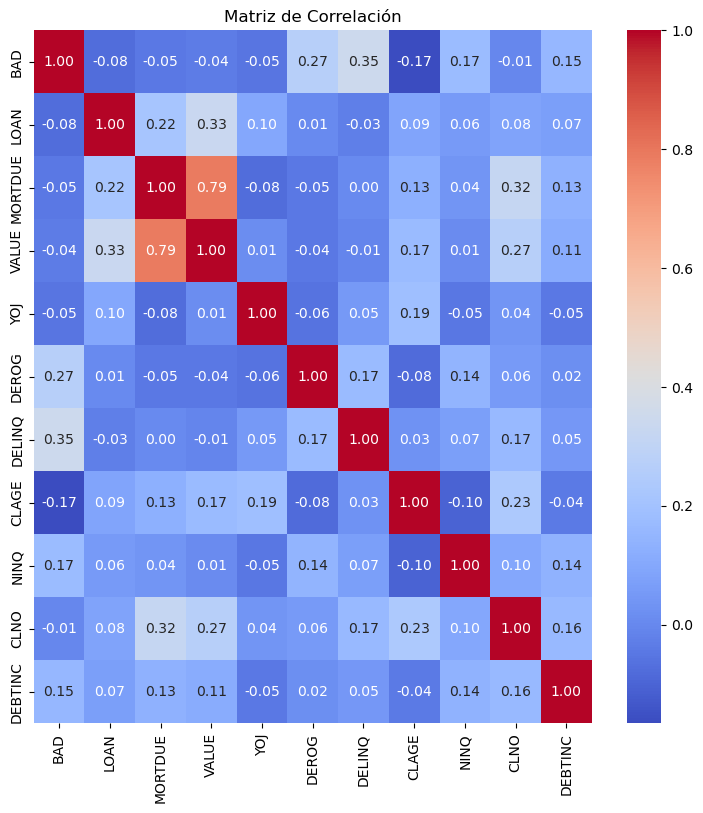

In [11]:
corr_dat = data.copy()
corr_dat = corr_dat.drop(["REASON", "JOB"], axis=1)
corr = corr_dat.corr(method='pearson')
plt.figure(figsize=(9,9))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", )
plt.title("Matriz de Correlación")
plt.show()

## 4- Outliers: Identifica y trata los valores atípicos si afectan el análisis.

In [12]:
def view_outlier_zscore(data, columna):
      z_scores = stats.zscore(data[columna])
      abs_z_scores = np.abs(z_scores)
      outlier_with_zscore = (abs_z_scores > 3)
      outlier_indices = np.where(outlier_with_zscore)[0]
      return outlier_indices

# print(view_outlier_zscore(data, "YOJ"))
# print("------------------------------")

from scipy.stats.mstats import winsorize

columnas = ["LOAN", "MORTDUE", "VALUE", "YOJ", "CLAGE", "DEBTINC"]

for col in columnas:
    data[col] = winsorize(data[col], limits=[0.05, 0.05])

In [13]:
# # Lista de columnas que se deben procesar
# columns_to_process = ['MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'DEBTINC']

# # Función para detectar y recortar outliers usando IQR
# def process_outliers_iqr(data, column):
#     Q1 = data[column].quantile(0.25)
#     Q3 = data[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_limit = Q1 - 1.5 * IQR
#     upper_limit = Q3 + 1.5 * IQR
#     data[column] = data[column].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))

# # Función para detectar outliers usando Z-score
# def process_outliers_zscore(data, column):
#     z_scores = stats.zscore(data[column])
#     abs_z_scores = np.abs(z_scores)
#     outliers = (abs_z_scores > 3)
#     outlier_indices = np.where(outliers)[0]
#     outlier_values = data[column].iloc[outlier_indices]
#     sorted_outlier_values_descending = outlier_values.sort_values(ascending=False)
#     return sorted_outlier_values_descending

# # Procesar cada columna
# for column in columns_to_process:
#     # Aplicar IQR
#     process_outliers_iqr(data, column)

#     # Mostrar los outliers detectados por Z-score
#     print(f"Outliers en la columna '{column}' detectados por Z-score:")
#     outliers_z = process_outliers_zscore(data, column)
#     print(outliers_z)
#     print("\n" + "-"*50 + "\n")

# from scipy.stats import skew

# # Lista de columnas a analizar
# columns_to_analyze = ["MORTDUE", "VALUE", "YOJ", "CLAGE", "LOAN"]

# # Calcular la skewness para cada columna
# skewness_values = {}
# for column in columns_to_analyze:
#     skew_value = skew(data[column].dropna())  # dropna() para evitar valores NaN
#     skewness_values[column] = skew_value

# # Mostrar los resultados
# for column, skew_value in skewness_values.items():
#     print(f"Skewness de la columna '{column}': {skew_value:.3f}")


In [14]:
# # Asumiendo que tienes tus datos en un DataFrame o lista llamada 'data'
# # con una columna 'CLNO'

# # Calculando los cuartiles
# Q1 = np.percentile(data['LOAN'], 25)
# Q3 = np.percentile(data['LOAN'], 75)
# IQR = Q3 - Q1

# # Definiendo los límites para outliers
# upper_bound = Q3 + 1.5 * IQR
# lower_bound = Q1 - 1.5 * IQR

# # Identificando outliers
# outliers = data[(data['LOAN'] > upper_bound) | (data['LOAN'] < lower_bound)]

# print(f"Q1: {Q1}")
# print(f"Q3: {Q3}")
# print(f"IQR: {IQR}")
# print(f"Límite superior: {upper_bound}")
# print(f"Límite inferior: {lower_bound}")
# print(f"Número de outliers: {len(outliers)}")
# print("Valores outliers:")
# print(outliers['LOAN'].values)

# ENCODED

In [15]:
encode_columns = ["REASON", "JOB"]

data_encoded = pd.get_dummies(data, columns=encode_columns, drop_first=True)

print(data_encoded.head())

# --------------------------------
# from sklearn.preprocessing import LabelEncoder

# le_job = LabelEncoder()
# le_reason = LabelEncoder()

# data['JOB_ENC'] = le_job.fit_transform(data['JOB'])
# data['REASON_ENC'] = le_reason.fit_transform(data['REASON'])

# data_encoded = data.drop(["JOB", "REASON"], axis=1)

# print(data_encoded.head())

# /----------------------------------------------
# from sklearn.preprocessing import OneHotEncoder

# # Seleccionar columnas a codificar
# cols = ['JOB', 'REASON']

# # Crear el codificador
# encoder = OneHotEncoder(drop='first', sparse_output=False)

# # Ajustar y transformar
# encoded = encoder.fit_transform(data[cols])

# # Crear nombres de columnas codificadas
# encoded_cols = encoder.get_feature_names_out(cols)

# # Crear DataFrame con las columnas codificadas
# encoded_df = pd.DataFrame(encoded, columns=encoded_cols, index=data.index)

# # Unir con el DataFrame original (sin las columnas originales)
# data_encoded = pd.concat([data.drop(cols, axis=1), encoded_df], axis=1)

# print(data_encoded.head())

   BAD  LOAN  MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  CLNO  \
0    1  5900  25860.0   39264.0  10.5    0.0     0.0   94.366667   1.0   9.0   
1    1  5900  70053.0   68400.0   7.0    0.0     2.0  121.833333   0.0  14.0   
2    1  5900  19111.0   39264.0   4.0    0.0     0.0  149.466667   1.0  10.0   
3    1  5900  65019.0   89235.5   7.0    0.0     0.0  173.466667   0.0  16.0   
4    0  5900  97800.0  112000.0   3.0    0.0     0.0   93.333333   0.0  14.0   

     DEBTINC  REASON_HomeImp  JOB_Office  JOB_Other  JOB_ProfExe  JOB_Sales  \
0  34.818262               1           0          1            0          0   
1  34.818262               1           0          1            0          0   
2  34.818262               1           0          1            0          0   
3  34.818262               0           0          1            0          0   
4  34.818262               1           1          0            0          0   

   JOB_Self  
0         0  
1         0  
2 

# MODELOS

In [16]:
Random_forest = data_encoded.copy()
KNN = data_encoded.copy()
SVM = data_encoded.copy()
Regresion = data_encoded.copy()
XGBoost = data_encoded.copy()

Mejor umbral F1: 0.42
MODELO RANDOM FOREST CON SMOTE + UMBRAL ÓPTIMO


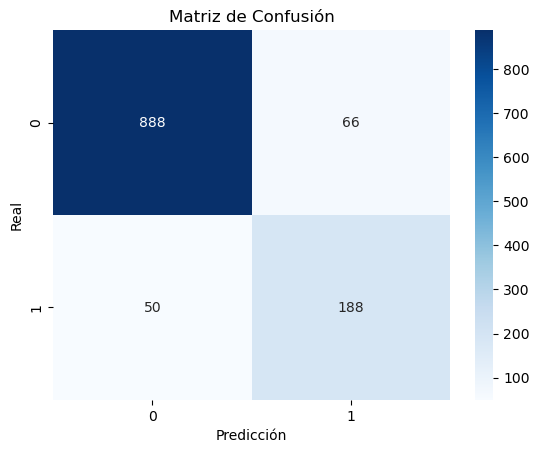

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       954
           1       0.74      0.79      0.76       238

    accuracy                           0.90      1192
   macro avg       0.84      0.86      0.85      1192
weighted avg       0.91      0.90      0.90      1192

0.9026845637583892


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                            f1_score, precision_score, recall_score, roc_curve,
                            roc_auc_score, precision_recall_curve, auc)

from imblearn.over_sampling import SMOTE

from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

def matriz_confusion(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title('Matriz de Confusión')
    plt.show()

# separacion de datos
y = Random_forest['BAD']
X = Random_forest.drop('BAD', axis=1)

# segmentacion
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)

# escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE oversampling
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# ejecuando el modelo RF
model = RandomForestClassifier(random_state=42, criterion="entropy",max_depth=18, n_estimators=300)
# Entrenamiento final
model.fit(X_train_res, y_train_res)

# Predicciones de probabilidad
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Buscar umbral óptimo por F1-score
thresholds = np.arange(0.2, 0.6, 0.01)
f1_scores = [f1_score(y_test, (y_proba >= t).astype(int)) for t in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Mejor umbral F1: {best_threshold:.2f}")

# prediccion
pred_y = (y_proba >= best_threshold).astype(int)

print("MODELO RANDOM FOREST CON SMOTE + UMBRAL ÓPTIMO")
matriz_confusion(y_test, pred_y)

print(classification_report(y_test, pred_y))
print(accuracy_score(y_test, pred_y))

In [18]:
precision_random= precision_score(y_test, pred_y)
recall_random=recall_score(y_test, pred_y)
f1_random = f1_score(y_test, pred_y)
# cv_scores_random = scores.mean()
accuracy_random = accuracy_score(y_test, pred_y)

1. Preparando los datos...
Distribución de clases en datos de entrenamiento original: 
0    0.800545
1    0.199455
Name: BAD, dtype: float64

2. Buscando el mejor valor de k mediante validación cruzada...


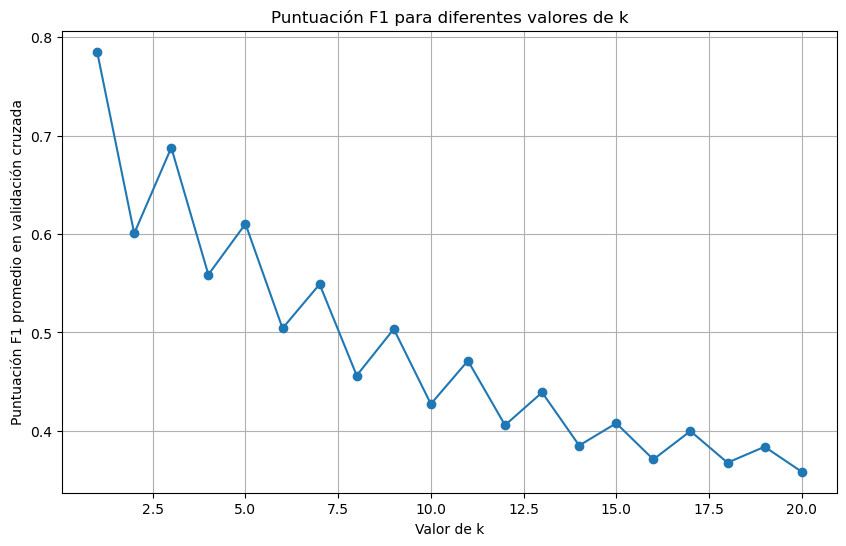

Mejor valor de k encontrado: 1

3. Optimizando hiperparámetros con GridSearchCV...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Mejores parámetros encontrados: {'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'distance'}
Mejor puntuación F1 en validación cruzada: 0.8459

4. Entrenando el modelo final con los mejores parámetros...

5. Evaluando el modelo y encontrando umbral óptimo...
Mejor umbral para F1: 0.28 (F1: 0.8943)
F1 con umbral estándar (0.5): 0.8578


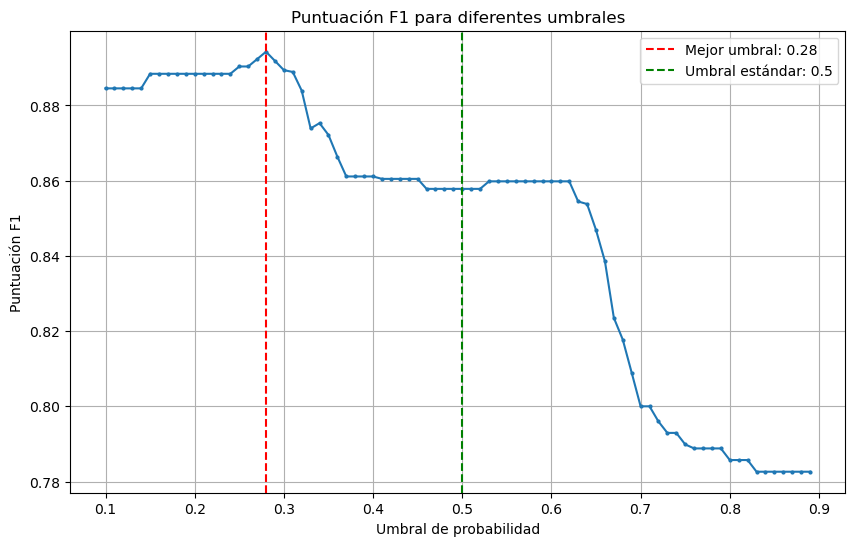


6. Resultados finales del modelo:

--- REPORTE DE CLASIFICACIÓN ---
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       954
           1       0.94      0.85      0.89       238

    accuracy                           0.96      1192
   macro avg       0.95      0.92      0.93      1192
weighted avg       0.96      0.96      0.96      1192


Exactitud (Accuracy): 0.9597

--- MATRIZ DE CONFUSIÓN ---


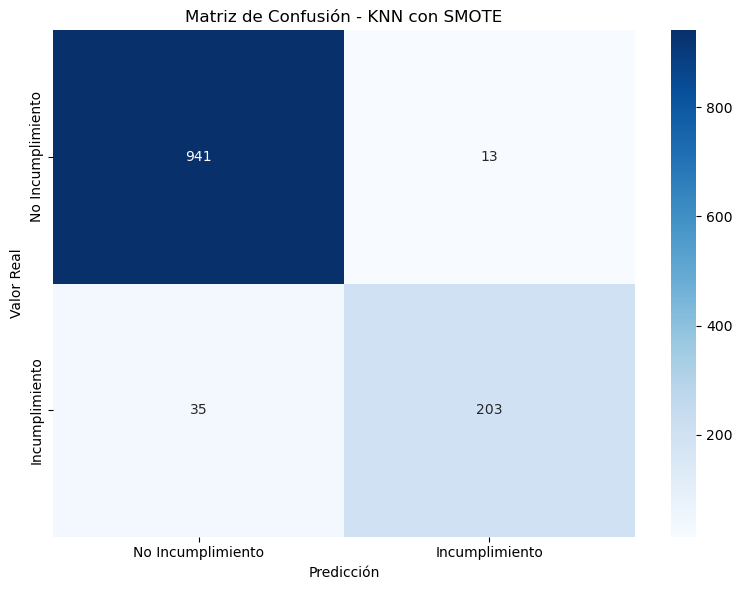

Precisión (PPV): 0.9398
Valor Predictivo Negativo (NPV): 0.9641
Sensibilidad/Recall: 0.8529
Especificidad: 0.9864

7. Visualizando curvas de evaluación...


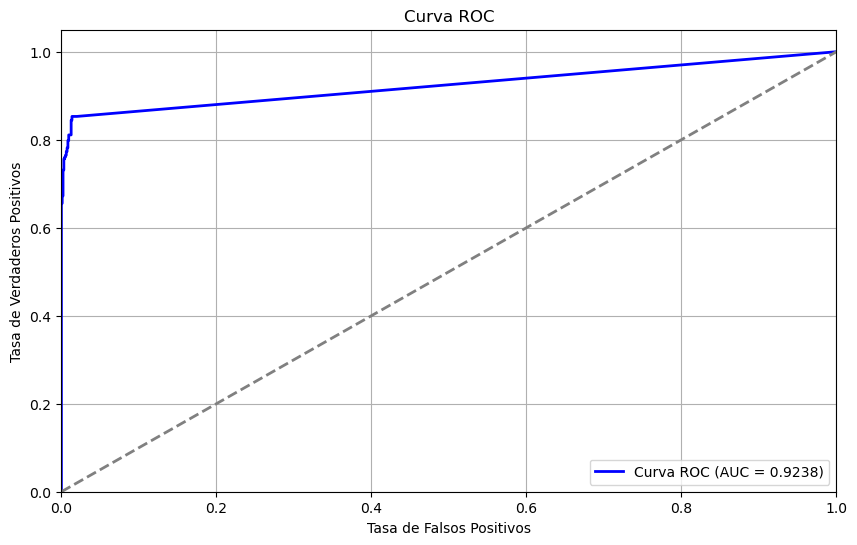

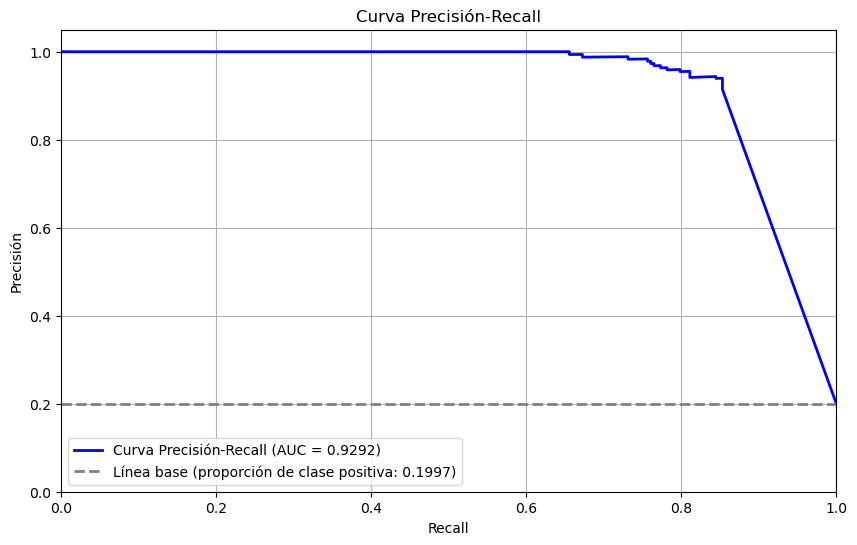


8. Análisis final del modelo KNN con SMOTE
El modelo KNN optimizado logra una puntuación F1 de 0.8943 utilizando un umbral de 0.28
AUC-ROC: 0.9238
AUC Precisión-Recall: 0.9292
Modelo guardado como 'knn_smote_model.pkl'


In [19]:
from sklearn.neighbors import KNeighborsClassifier

# X = KNN.drop('BAD', axis=1)


# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)


# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)


# model = KNeighborsClassifier(n_neighbors = 3)


# model.fit(X_train_res, y_train_res)


# y_proba = model.predict_proba(X_test_scaled)[:, 1]

# thresholds = np.arange(0.2, 0.6, 0.01)
# f1_scores = [f1_score(y_test, (y_proba >= t).astype(int)) for t in thresholds]
# best_threshold = thresholds[np.argmax(f1_scores)]
# print(f"Mejor umbral F1: {best_threshold:.2f}")


# pred_y = (y_proba >= best_threshold).astype(int)

# print("MODELO KNN CON SMOTE + UMBRAL ÓPTIMO")
# matriz_confusion(y_test, pred_y)
# print(classification_report(y_test, pred_y))
# print(accuracy_score(y_test, pred_y))

#---------------------


# Función para visualizar la matriz de confusión
def mostrar_matriz_confusion(y_true, y_pred, titulo='Matriz de Confusión'):
    """
    Crea y muestra una matriz de confusión con mejor formato visual
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Incumplimiento', 'Incumplimiento'],
                yticklabels=['No Incumplimiento', 'Incumplimiento'])
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.title(titulo)
    plt.tight_layout()
    plt.show()

    # Calculamos métricas adicionales de la matriz
    tn, fp, fn, tp = cm.ravel()

    # Positive Predictive Value (Precision) y Negative Predictive Value
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0

    # Sensitivity (Recall) y Specificity
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    print(f"Precisión (PPV): {precision:.4f}")
    print(f"Valor Predictivo Negativo (NPV): {npv:.4f}")
    print(f"Sensibilidad/Recall: {sensitivity:.4f}")
    print(f"Especificidad: {specificity:.4f}")

# 1. Separar datos
print("1. Preparando los datos...")
y = KNN['BAD']
X = KNN.drop(['BAD', 'REASON_HomeImp'], axis=1)

# 2. Train-test split con stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42, stratify=y
)

print(f"Distribución de clases en datos de entrenamiento original: \n{y_train.value_counts(normalize=True)}")

# 3. Encontrar el mejor valor de k mediante validación cruzada
print("\n2. Buscando el mejor valor de k mediante validación cruzada...")
k_range = range(1, 21)
k_scores = []

# Pipeline básico para la validación cruzada inicial
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Evaluamos diferentes valores de k
for k in k_range:
    pipeline.set_params(knn__n_neighbors=k)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')
    k_scores.append(scores.mean())

# Visualización de resultados de k
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('Valor de k')
plt.ylabel('Puntuación F1 promedio en validación cruzada')
plt.title('Puntuación F1 para diferentes valores de k')
plt.grid(True)
plt.show()

# Encontramos el mejor k
best_k = k_range[np.argmax(k_scores)]
print(f"Mejor valor de k encontrado: {best_k}")

# Aplicamos GridSearchCV para buscar mejores hiperparámetros
print("\n3. Optimizando hiperparámetros con GridSearchCV...")
# Definimos el pipeline con SMOTE
smote_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier())
])

# Parámetros para buscar
param_grid = {
    'knn__n_neighbors': [best_k-1, best_k, best_k+1] if best_k > 1 else [1, 2, 3],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2],  # Distancia Manhattan (p=1) o Euclidiana (p=2)
}

# Realizamos la búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    smote_pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1
)
grid_search.fit(X_train, y_train)

# Mostramos los mejores parámetros
print(f"\nMejores parámetros encontrados: {grid_search.best_params_}")
print(f"Mejor puntuación F1 en validación cruzada: {grid_search.best_score_:.4f}")

# Entrenamos el modelo final con los mejores parámetros
print("\n4. Entrenando el modelo final con los mejores parámetros...")
best_model = grid_search.best_estimator_

# Evaluación en conjunto de prueba
# Obtenemos predicciones de probabilidad
print("\n5. Evaluando el modelo y encontrando umbral óptimo...")
y_proba = best_model.predict_proba(X_test)[:, 1]

# Buscamos el umbral óptimo para F1
thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = [f1_score(y_test, (y_proba >= t).astype(int)) for t in thresholds]
best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_idx]
best_f1 = f1_scores[best_threshold_idx]

print(f"Mejor umbral para F1: {best_threshold:.2f} (F1: {best_f1:.4f})")

# Comparamos con el umbral estándar de 0.5
standard_f1 = f1_score(y_test, (y_proba >= 0.5).astype(int))
print(f"F1 con umbral estándar (0.5): {standard_f1:.4f}")

# Visualizamos la relación entre umbrales y F1
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='.', markersize=4)
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Mejor umbral: {best_threshold:.2f}')
plt.axvline(x=0.5, color='g', linestyle='--', label='Umbral estándar: 0.5')
plt.xlabel('Umbral de probabilidad')
plt.ylabel('Puntuación F1')
plt.title('Puntuación F1 para diferentes umbrales')
plt.legend()
plt.grid(True)
plt.show()

# Generamos predicciones finales con el umbral óptimo
y_pred = (y_proba >= best_threshold).astype(int)

# Evaluación completa
print("\n6. Resultados finales del modelo:")
print("\n--- REPORTE DE CLASIFICACIÓN ---")
print(classification_report(y_test, y_pred))
#.........................................................................
print(f"\nExactitud (Accuracy): {accuracy_score(y_test, y_pred):.4f}")

accuracy_knn = accuracy_score(y_test, y_pred)

# Mostramos matriz de confusión
print("\n--- MATRIZ DE CONFUSIÓN ---")
mostrar_matriz_confusion(y_test, y_pred, titulo='Matriz de Confusión - KNN con SMOTE')

# Visualización de curva ROC
print("\n7. Visualizando curvas de evaluación...")
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Curva Precisión-Recall
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Curva Precisión-Recall (AUC = {pr_auc:.4f})')
plt.axhline(y=sum(y_test)/len(y_test), color='gray', lw=2, linestyle='--',
            label=f'Línea base (proporción de clase positiva: {sum(y_test)/len(y_test):.4f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curva Precisión-Recall')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

print("\n8. Análisis final del modelo KNN con SMOTE")
print(f"El modelo KNN optimizado logra una puntuación F1 de {best_f1:.4f} utilizando un umbral de {best_threshold:.2f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print(f"AUC Precisión-Recall: {pr_auc:.4f}")

# Guardamos
import joblib
joblib.dump(best_model, 'knn_smote_model.pkl')
print("Modelo guardado como 'knn_smote_model.pkl'")

In [20]:
precision_knn= precision_score(y_test, y_pred)
recall_knn=recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)
cv_scores_knn = scores.mean()

In [21]:
from xgboost import XGBClassifier

# Separar datos
y = XGBoost['BAD']
X = XGBoost.drop('BAD', axis=1)

# Train-test split con stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE oversampling
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

#  Modelo XGBoost
model = XGBClassifier(eval_metric='logloss', random_state=42)

#  Entrenamiento
model.fit(X_train_res, y_train_res)

# Predicción de probabilidades
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# 8. Umbral óptimo por F1
thresholds = np.arange(0.2, 0.6, 0.01)
f1_scores = [f1_score(y_test, (y_proba >= t).astype(int)) for t in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Mejor umbral F1: {best_threshold:.2f}")

#  Predicción final
pred_y = (y_proba >= best_threshold).astype(int)

#  Evaluación
print("MODELO XGBOOST CON SMOTE + UMBRAL ÓPTIMO")
matriz_confusion(y_test, pred_y)
print(classification_report(y_test, pred_y))
print(accuracy_score(y_test, pred_y))

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
precision_xgb= precision_score(y_test, pred_y)
recall_xgb=recall_score(y_test, pred_y)
f1_xgb = f1_score(y_test, pred_y)
accuracy_xgb = accuracy_score(y_test, pred_y)
cv_scores_xgb = scores.mean()

In [ ]:
model_metrics_list = []

model_metrics_list.append({
    'Model': 'KNN',
    'Accuracy': accuracy_knn,
    'Precision': precision_knn,
    'Recall': recall_knn,
    'F1 Score': f1_knn,
    # 'Mean CV Accuracy': cv_scores_knn.mean()
})

model_metrics_list.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_random,
    'Precision': precision_random,
    'Recall': recall_random,
    'F1 Score': f1_random,
    # 'Mean CV Accuracy': cv_scores_random.mean()
})

model_metrics_list.append({
    'Model': 'XGBoost',
    'Accuracy': accuracy_xgb,
    'Precision': precision_xgb,
    'Recall': recall_xgb,
    'F1 Score': f1_xgb,
    # 'Mean CV Accuracy': cv_scores_xgb.mean()
})

all_metrics_df = pd.DataFrame(model_metrics_list)

all_metrics_df

# CONLUSIONES

LA winsorizacion combinado con un codigo que me permita calcular los mejores parametro para un modelo, pude optimizar el modelo al maximo y sacar el mejor provecho, LA WINSORIZACION POR SI SOLA NO MEJORO EL MODELO KNN, TENGO QUE COMBINARLO CON LOS PARAMETRO DE MAYOR RENDIMIENTO PARA QUE ME DE EL MEJOR RESULTADO ESTO.

Existen varias formas de tratar los outlier, (IQR, z-score, winsorizacion).

winsorizacion: es un metodo para cuando no quieres eliminar informacion.
z-score: si los datos siguen una distribucion normal, es ideal para tratar los outlier.
IQR: es mas robusto a valores atipico y para cuando los datos no siguen una distribucion normal.

en este caso decidi usar winzorizacion, porque los datos estaban desbalanceado y sesgado hacia la clase mayoritaria que es la clase de los clientes que "si pagaron", que es la clase 0, por lo tanto si eliminaba datos el modelo quedaba mas desbalanceado aun porque tenia menos informacion para analizar a la clase 1, por lo que decidi preservar toda la informacion posible.

Para este analisis en particular la clase minoritaria era importante ya que representa los casos de impago, que es lo que queremos detectar con nuestro modelo y KNN tuvo la mejor relacion (f1 score), lo cual es indica que es altamente preciso clasificando los casos positivos, lo que significa en termino practicos que no clasifica los datos negativos como positivos.

que en resumidas cuentas es lo que nos interesa, no poner clientes que no vayan a pagar, en la clasificacion de los que si pagan.